In [ ]:
import infomap
import collections
import networkx as nx
import networkx.algorithms as nalgos
import matplotlib.pyplot as plt
import matplotlib.colors as colors


class Graph:
    graph = nx.DiGraph()

    def __init__(self):
        self.graph = nx.DiGraph()

    def createGraph(self, filename):
        file = open(filename, 'r')

        for line in file.readlines():
            nodes = line.split()
            edge = (int(nodes[0]), int(nodes[1]))
            self.graph.add_edge(*edge)

        return self.graph


class Infomap:
    graph = Graph()

    def __init__(self, G):
        self.graph = G

    def findCommunities(self, G):
        """
        用 InfoMap 算法划分网络。
        用 "社区 "ID对节点进行注释，并返回发现的社区数量。
        """
        infomapWrapper = infomap.Infomap("--two-level --directed")
        network = infomapWrapper.network

        print("Building Infomap network from a NetworkX graph...")
        for e in G.edges():
            network.addLink(*e)

        print("Find communities with Infomap...")
        infomapWrapper.run()

        tree = infomapWrapper.iterTree()

        print("Found %d modules with codelength: %f" % (infomapWrapper.numTopModules(), infomapWrapper.codelength))

        # 为每个节点打上社区标签作为属性
        communities = {}
        for node in infomapWrapper.iterLeafNodes():
            communities[node.physicalId] = node.moduleIndex()

        nx.set_node_attributes(G, name='community', values=communities)

        # communities = collections.defaultdict(lambda: list())
        # for node in infomapWrapper.iterLeafNodes():
        #     communities[node.moduleIndex()].append(node.physicalId)
        # print(communities)

        return infomapWrapper.numTopModules()

    def printCom(self, G):
        self.findCommunities(G)
        communities = collections.defaultdict(lambda: list())
        for k, v in nx.get_node_attributes(G, 'community').items():
            communities[v].append(k)
        communitie_sort = sorted(communities.values(), key=lambda b: -len(b))
        count = 0
        for communitie in communitie_sort:
            count += 1
            print(f'社区{count},成员{communitie}', end='\n')
        print(self.cal_Q(communities.values()))

    def drawNetwork(self, G):
        # position map
        pos = nx.spring_layout(G)
        # community ids
        communities = [v for k, v in nx.get_node_attributes(G, 'community').items()]
        numCommunities = max(communities) + 1
        # color map from http://colorbrewer2.org/
        cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed',
                                          numCommunities)
        cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed',
                                         numCommunities)

        # Draw edges
        nx.draw_networkx_edges(G, pos)

        # Draw nodes
        nodeCollection = nx.draw_networkx_nodes(G,
                                                pos=pos,
                                                node_color=communities,
                                                cmap=cmapLight
                                                )
        # Set node border color to the darker shade
        darkColors = [cmapDark(v) for v in communities]
        nodeCollection.set_edgecolor(darkColors)

        # Draw node labels
        for n in G.nodes():
            plt.annotate(n,
                         xy=pos[n],
                         textcoords='offset points',
                         horizontalalignment='center',
                         verticalalignment='center',
                         xytext=[0, 0],
                         color=cmapDark(communities[n - 1])
                         )

        plt.axis('off')
        plt.savefig("image1.png")
        plt.show()

    def cal_Q(self, partition):  # 计算Q
        m = len(self.graph.edges(None, False))  # 如果为真，则返回3元组（u、v、ddict）中的边缘属性dict。如果为false，则返回2元组（u，v）
        # print(G.edges(None,False))
        # print("=======6666666")
        a = []
        e = []
        for community in partition:  # 把每一个联通子图拿出来
            t = 0.0
            for node in community:  # 找出联通子图的每一个顶点
                t += len([x for x in self.graph.neighbors(node)])  # G.neighbors(node)找node节点的邻接节点
            a.append(t / (2 * m))
        #             self.zidian[t/(2*m)]=community
        for community in partition:
            t = 0.0
            for i in range(len(community)):
                for j in range(len(community)):
                    if (self.graph.has_edge(community[i], community[j])):
                        t += 1.0
            e.append(t / (2 * m))

        q = 0.0
        for ei, ai in zip(e, a):
            q += (ei - ai ** 2)
        return q

 
    def visualize(self, G):
        self.findCommunities(G)
        self.drawNetwork(G)


obj = Graph()
# graph = nx.karate_club_graph()
# graph = obj.createGraph("data//google.txt")
graph = obj.createGraph("../dataset/social/karate.txt")


a = Infomap(graph)
# a.findCommunities(graph)
# a.visualize(graph)
a.printCom(graph)
a.drawNetwork(graph)


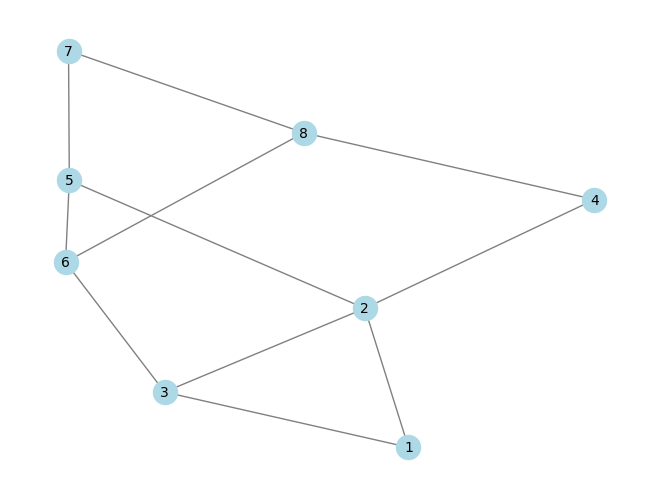

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个有8个节点的网络
G = nx.Graph()
G.add_nodes_from(range(1, 9))

# 定义节点之间的边
edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 2), (4, 8), (5, 6), (5, 7), (6, 8), (7, 8)]

# 添加边到网络中
G.add_edges_from(edges)

# 绘制网络图
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10)
plt.show()